Произведем ипорт необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Рассмотрим функции.

In [2]:
def f_x(x):
    y = (x**3 + 4) / x**2
    return y

def g_x(x: np.linspace, a: list):
    y = 0
    for i in range(len(a)):
        y += float(a[i])*(x**i)
    return y

def fmin(x_l, x_r):
    dx = 1e-2
    for _ in range(1000):
        x_c = 0.5*(x_l + x_r)
        if f_x(x_c - dx) > f_x(x_c + dx):
            x_l = x_c
        else: x_r = x_c
    return x_c

def fmax(x_l, x_r):
    dx = 1e-2
    for _ in range(1000):
        x_c = 0.5*(x_l + x_r)
        if f_x(x_c - dx) < f_x(x_c + dx):
            x_l = x_c
        else: x_r = x_c
    return x_c

Обозначим константы и найдем min и max.

In [3]:
dx = 1e-3
x = np.linspace(-3, 4, 1000)
y = f_x(x)

k = 40
ar = [float(-3 + (7 * i / k)) for i in range(k + 1)]
pts = [[], []]
for i in range(len(ar) - 1):
    if not((-0.25 < ar[i] < 0.5) or (-0.25 < ar[i + 1] < 0.5)):
        mn = fmin(ar[i], ar[i + 1])
        mx = fmax(ar[i], ar[i + 1])
        pts[0].append(mn)
        pts[1].append(f_x(mn))
        pts[0].append(mx)
        pts[1].append(f_x(mx))

Отсортируем x.

In [4]:
for i in range(len(pts[0])):
    for j in range(i, len(pts[0])):
        if pts[0][i] >= pts[0][j]:
            pts[0][i], pts[0][j] = pts[0][j], pts[0][i]
            pts[1][i], pts[1][j] = pts[1][j], pts[1][i]

Уберем лишние точки.

In [5]:
pts_ = [[], []]
for i in range(len(pts[0])):
    if (i == 0) or (i == len(pts[0]) - 1):
        pts_[0].append(pts[0][i])
        pts_[1].append(pts[1][i])
    elif not((pts[1][i-1] <= pts[1][i] <= pts[1][i+1]) or (pts[1][i-1] >= pts[1][i] >= pts[1][i+1])):
        pts_[0].append(pts[0][i])
        pts_[1].append(pts[1][i])

Построим график.

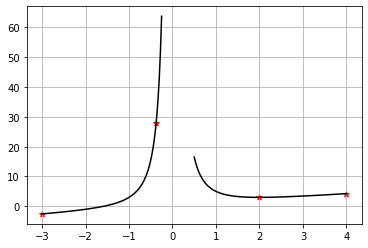

In [6]:
fig = plt.figure(10)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
x1 = np.linspace(-3, -0.25, 100)
x2 = np.linspace(0.5, 4, 100)
y1 = f_x(x1)
y2 = f_x(x2)
ax.plot(x1, y1, linewidth=1.5, color='black')
ax.plot(x2, y2, linewidth=1.5, color='black')
ax.scatter(pts_[0], pts_[1], linewidth=1, color='red', marker='*')
plt.show()